# **Data Visualization in Python using literacy Rate with Education Enrollment**


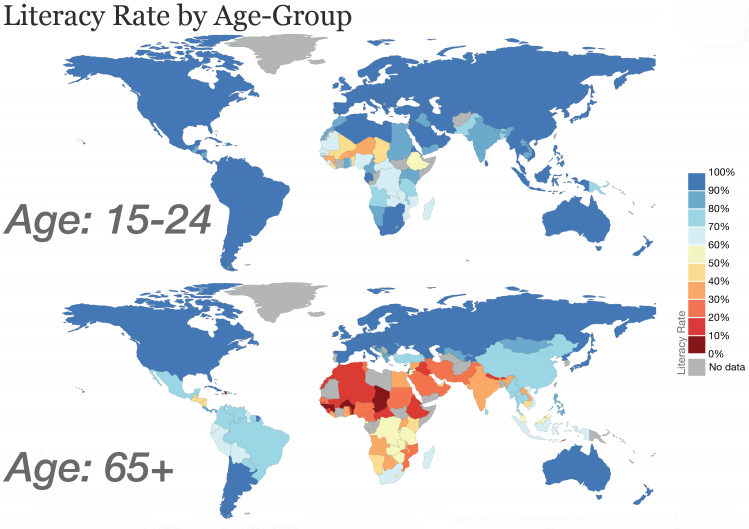


In [ ]:
#install a pip package in the current jupyter kernel

import sys
!{sys.executable} -m pip install profiling

In [3]:
!pip install plotly --upgrade
import numpy as np
np.set_printoptions(precision=4)                              # To display values only upto four decimal places.

import pandas as pd
pd.set_option('mode.chained_assignment', None)                      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)                           # To display all the data in each column
pd.options.display.max_columns = 80                                 # To display every column of the dataset in head()

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                                  # To apply seaborn whitegrid styleto the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)        # To adjust seaborn settings for the plots.

import warnings
warnings.filterwarnings('ignore')                                   # To suppress all the warnings in the notebook.
from pandas.plotting import parallel_coordinates

Requirement already up-to-date: plotly in c:\users\nasa\anaconda3\envs\pandas\lib\site-packages (4.3.0)


In [4]:
com = pd.read_csv("E:/Insaid Project/Insaid Project/Literacy Rate.csv")
com.head()

,Category,Country/ States/ Union Territories Name,Literacy Rate (Persons) - Total - 2001,Literacy Rate (Persons) - Total - 2011,Literacy Rate (Persons) - Rural - 2001,Literacy Rate (Persons) - Rural - 2011,Literacy Rate (Persons) - Urban - 2001,Literacy Rate (Persons) - Urban - 2011
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5
4,State,Bihar,47.0,61.8,43.9,59.8,71.9,76.9


In [5]:
com.describe()

,Literacy Rate (Persons) - Total - 2001,Literacy Rate (Persons) - Total - 2011,Literacy Rate (Persons) - Rural - 2001,Literacy Rate (Persons) - Rural - 2011,Literacy Rate (Persons) - Urban - 2001,Literacy Rate (Persons) - Urban - 2011
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,69.433333,77.711111,64.669444,73.413889,82.161111,86.283333
std,10.647709,8.497723,11.459440,9.190497,5.463138,4.982856
min,47.000000,61.800000,43.900000,59.800000,69.800000,75.100000
25%,62.975000,71.725000,57.425000,65.875000,79.275000,83.175000
50%,68.700000,76.600000,63.300000,71.900000,81.850000,86.250000
75%,77.225000,85.850000,74.275000,80.875000,84.925000,89.650000
max,90.900000,94.000000,90.000000,93.000000,96.100000,97.600000


(6.0, 0.0)

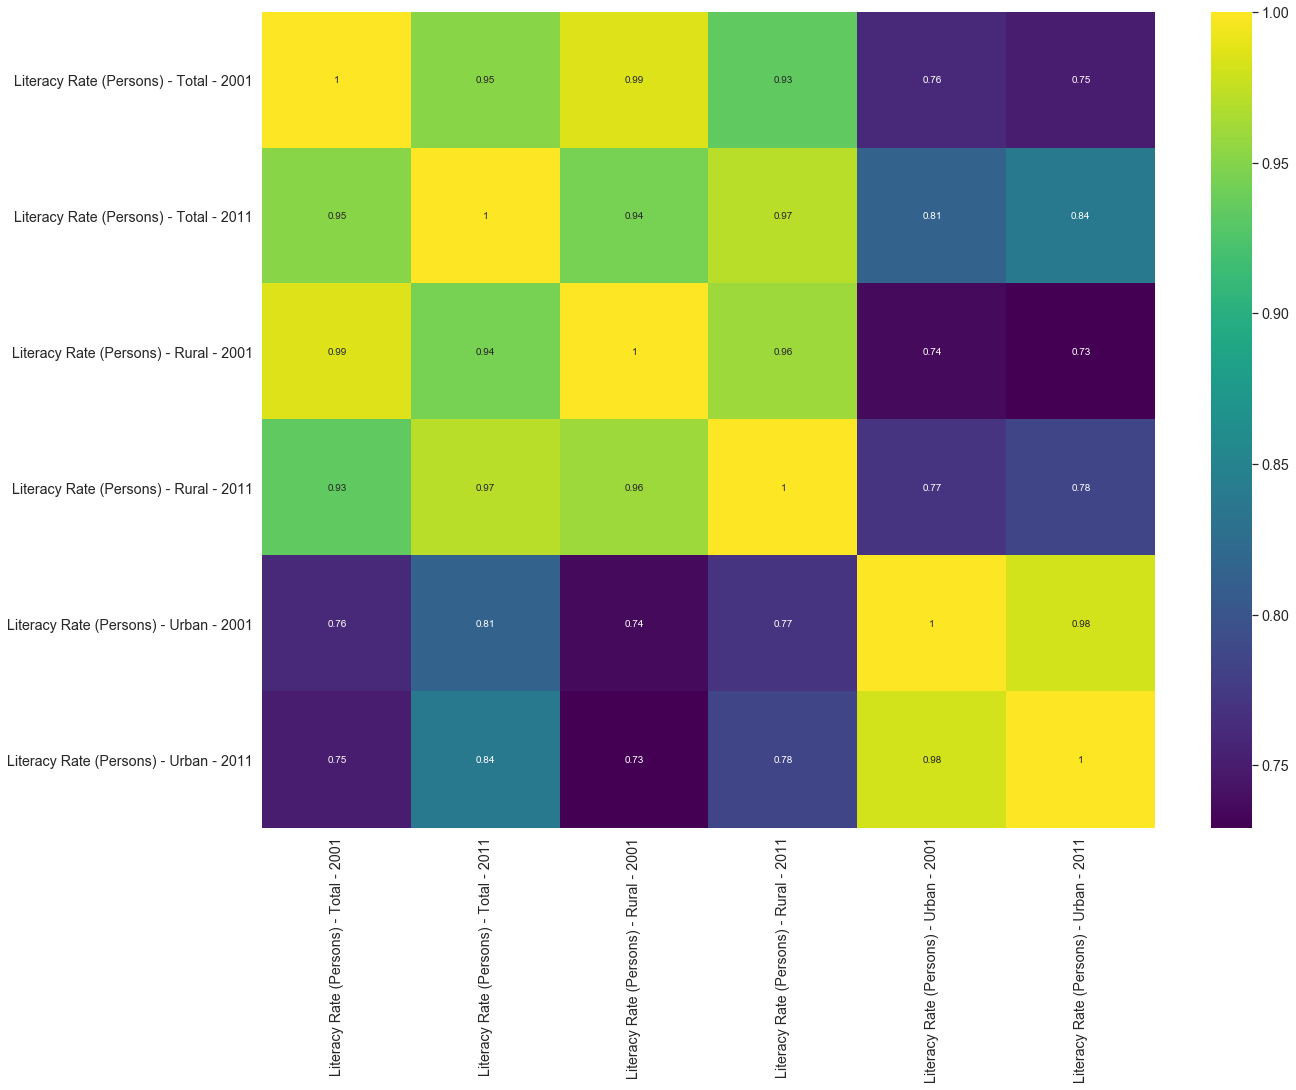

In [14]:
# Creating a correlation matrix using the corr function of the dataframe.
# Using seaborn's heatmap function to plot a heatmap of the correlatin matrix.

corr_mat = com.corr()
plt.subplots(figsize=(20,15))
ax= sns.heatmap(corr_mat, annot=True, cmap='viridis')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [9]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
Category                                   36 non-null object
Country/ States/ Union Territories Name    36 non-null object
Literacy Rate (Persons) - Total - 2001     36 non-null float64
Literacy Rate (Persons) - Total - 2011     36 non-null float64
Literacy Rate (Persons) - Rural - 2001     36 non-null float64
Literacy Rate (Persons) - Rural - 2011     36 non-null float64
Literacy Rate (Persons) - Urban - 2001     36 non-null float64
Literacy Rate (Persons) - Urban - 2011     36 non-null float64
dtypes: float64(6), object(2)
memory usage: 2.4+ KB


In [10]:
com_2 = pd.read_csv("E:\Insaid Project\Insaid Project\Enrollment ratio.csv")
com_2.head()

,STATES/UTs,ALL CATEGORIES - MALE,ALL CATEGORIES - FEMALE,ALL CATEGORIES - TOTAL,SC - MALE,SC - FEMALE,SC - TOTAL,ST - MALE,ST - FEMALE,ST - TOTAL
0,Andaman and Nicobar Islands,9.6,13.4,11.4,NaN,NaN,NaN,4.4,8.8,6.6
1,Andhra Pradesh,32.1,24.4,28.4,29.8,21.9,25.9,31.5,16.8,23.8
2,Arunachal Pradesh,33.6,19.5,26.9,100.0,66.0,100.0,24.3,16.1,20.1
3,Assam,13.3,13.4,13.4,10.4,12.2,11.2,13.5,13.2,13.4
4,Bihar,11.8,9.1,10.5,7.0,4.7,5.9,20.9,19.7,20.3


In [11]:
com_2.describe()

,ALL CATEGORIES - MALE,ALL CATEGORIES - FEMALE,ALL CATEGORIES - TOTAL,SC - MALE,SC - FEMALE,SC - TOTAL,ST - MALE,ST - FEMALE,ST - TOTAL
count,36.000000,36.000000,36.000000,33.000000,33.000000,33.000000,31.000000,31.000000,31.000000
mean,21.538889,19.022222,20.313889,22.924242,20.715152,22.324242,21.270968,18.996774,20.119355
std,10.299744,9.188443,9.558426,26.007367,23.433738,25.964050,23.684906,23.874037,23.649446
min,0.000000,0.000000,0.000000,2.300000,4.000000,3.300000,0.000000,0.000000,0.000000
25%,15.175000,13.025000,13.600000,10.700000,8.400000,10.200000,7.050000,5.250000,6.250000
50%,21.450000,18.350000,20.350000,12.400000,12.400000,13.700000,15.700000,13.200000,13.400000
75%,28.075000,24.575000,27.075000,23.400000,21.900000,21.700000,22.850000,19.300000,20.350000
max,42.200000,40.400000,41.400000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


(9.0, 0.0)

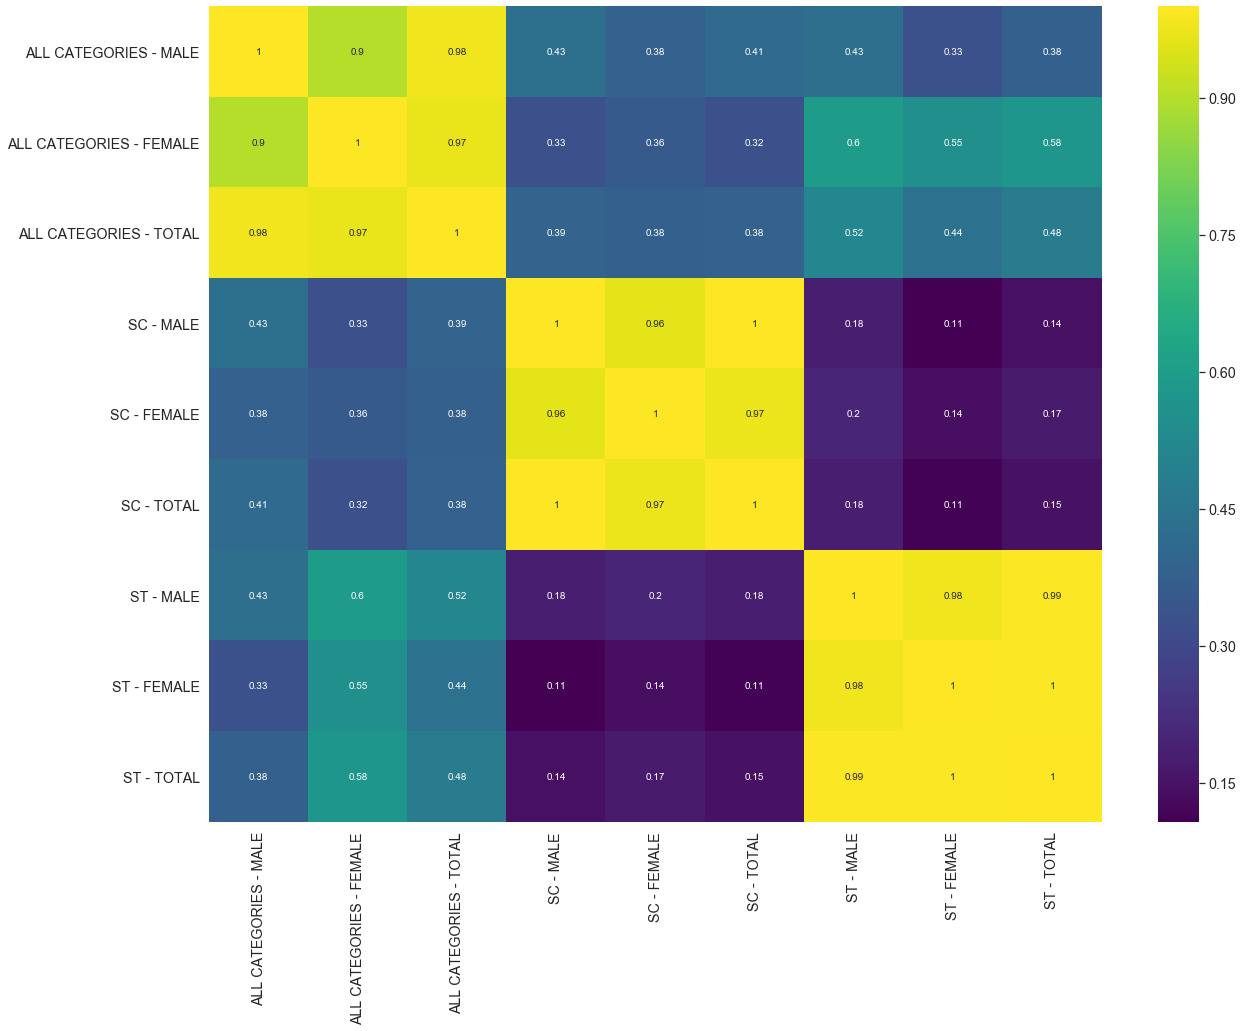

In [12]:
# Creating a correlation matrix using the corr function of the dataframe.
# Using seaborn's heatmap function to plot a heatmap of the correlatin matrix.

corr_mat = com_2.corr()
plt.subplots(figsize=(20,15))
ax= sns.heatmap(corr_mat, annot=True, cmap='viridis')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [13]:
com_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
STATES/UTs                 36 non-null object
ALL CATEGORIES - MALE      36 non-null float64
ALL CATEGORIES - FEMALE    36 non-null float64
ALL CATEGORIES - TOTAL     36 non-null float64
SC - MALE                  33 non-null float64
SC - FEMALE                33 non-null float64
SC - TOTAL                 33 non-null float64
ST - MALE                  31 non-null float64
ST - FEMALE                31 non-null float64
ST - TOTAL                 31 non-null float64
dtypes: float64(9), object(1)
memory usage: 2.9+ KB
